In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

In [2]:
#Load data
df = pd.read_csv('Profit.csv', parse_dates = ['date'], index_col = ['date'])


In [3]:
#check the data
print(df.columns)
df.head()


Index(['Profit'], dtype='object')


,Profit
date,
2011-01-01,-26
2011-01-03,290
2011-01-04,21
2011-01-04,-22
2011-01-05,-1


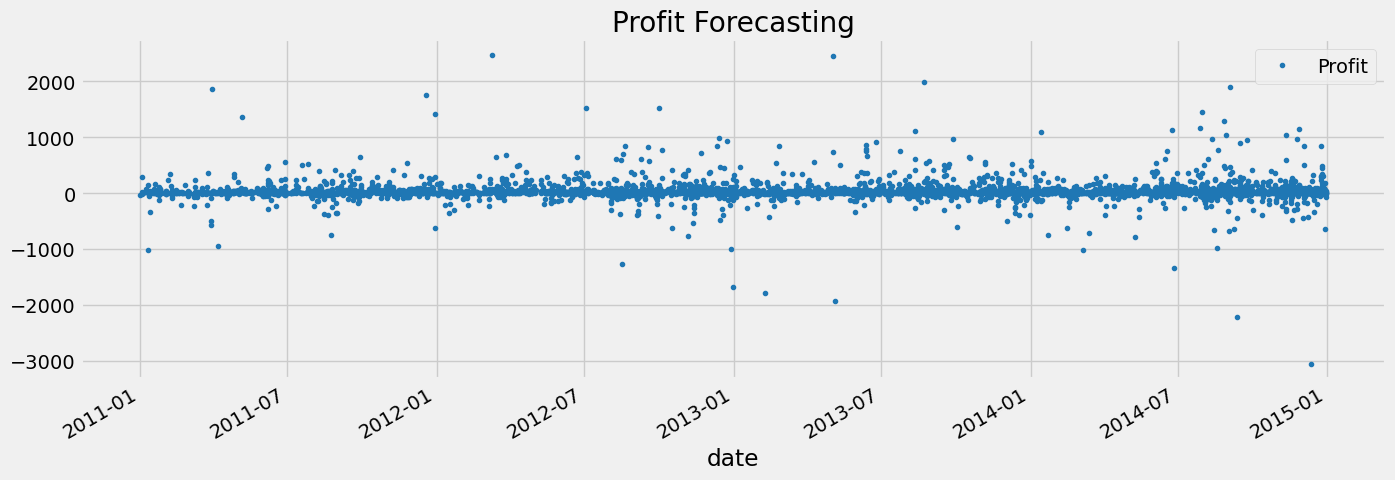

In [4]:
#plot the data
df.plot(style = ".", figsize = (15, 5), color = color_pal[0], title = "Profit Forecasting")
plt.show()

In [5]:
#Create the features (define a function) or split into day, month, year, and quarter 
def create_features(df):
    df = df.copy()
    df["dayofweek"] = df.index.dayofweek
    df["month"] = df.index.month
    df["quarter"] = df.index.quarter
    df["year"] = df.index.year
    df["dayofyear"] = df.index.dayofyear
    return df

df = create_features(df)


In [6]:
print(df.columns)
df.head()

Index(['Profit', 'dayofweek', 'month', 'quarter', 'year', 'dayofyear'], dtype='object')


,Profit,dayofweek,month,quarter,year,dayofyear
date,,,,,,
2011-01-01,-26,5,1,1,2011,1
2011-01-03,290,0,1,1,2011,3
2011-01-04,21,1,1,1,2011,4
2011-01-04,-22,1,1,1,2011,4
2011-01-05,-1,2,1,1,2011,5


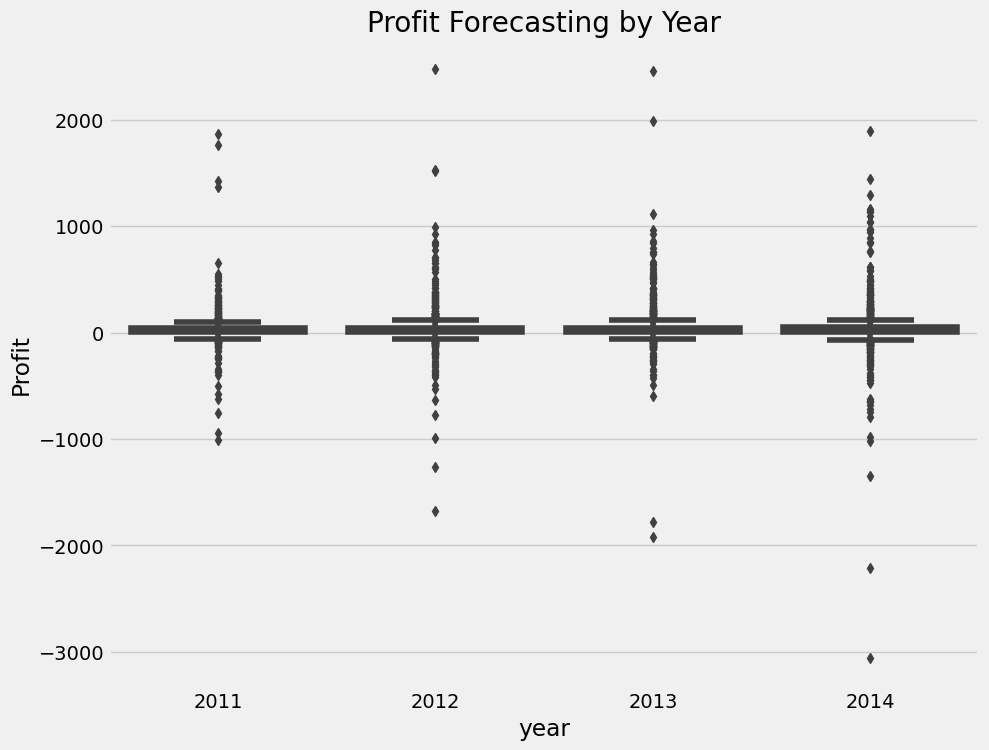

In [7]:
# Visualize target/feature relationship by date
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x="year", y="Profit")  # Adjusted 'sales' to 'Profit'
ax.set_title("Profit Forecasting by Year")
plt.show()

In [8]:
#convert or aggregate daily to monthly sales
ts=df['sales'].resample('M').sum()

KeyError: 'sales'

In [ ]:
monthly_profit = df['Profit'].resample('M').sum()

In [ ]:
ts=df['Profit'].resample('M').sum()

In [ ]:
#Plot the new dataset
ts.plot()

In [ ]:
#Determine the number of months in the dataset - based on the length, then determine the size of train and test 
len(ts)

In [ ]:
#Set train and test data 
train=ts[:20]
test=ts[20:]

In [ ]:
#set the 3 objects for ARIMA model - Autoregressive Integrated Moving Average (ARIMA)
#An ARIMA model has three component functions (p, q d): (1 AR)(p), the number of lag observations or autoregressive terms in the model;
(2 I) d -  the difference in the nonseasonal observations (3 MA) q -  the size of the moving average window.

In [ ]:
#set the 3 objects for ARIMA model - Autoregressive Integrated Moving Average (ARIMA)
#An ARIMA model has three component functions (p, q d): (1 AR)(p), the number of lag observations or autoregressive terms in the model;
(2 I) d -  the difference in the nonseasonal observations (3 MA) q -  the size of the moving average window.

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5,0,4,)).fit()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is your training dataset
# Initialize the ARIMA model with parameters p=5, d=0, q=4
model = ARIMA(train, order=(5, 0, 4)).fit()

 


In [ ]:
# Importing the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is a predefined dataset you're using to train the ARIMA model
# The order of the model is specified with (p,d,q). In this case, it's (5,1,4)

model = ARIMA(train, order=(5,1,4)).fit()


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(data_aggregated['Profit'])
p_value = adf_result[1]

# Print p-value to check for stationarity
print(f'ADF Test p-value: {p_value}')

# If p-value is less than 0.05, we can assume stationarity and proceed with ARIMA model fitting
if p_value < 0.05:
    # Fit an ARIMA model with initial order (1, 0, 1)
    model = ARIMA(data_aggregated['Profit'], order=(5, 0, 4))
    model_fit = model.fit()

    # Display the model summary
    print(model_fit.summary())
else:
    print("Data is not stationary. Consider differencing or transforming the data.")


In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


# Convert 'date' column to datetime and sort by date
data['date'] = pd.to_datetime(data['date'])
data_aggregated = data.groupby('date')['Profit'].sum().reset_index()
data_aggregated.sort_values('date', inplace=True)
data_aggregated.set_index('date', inplace=True)

# Perform Augmented Dickey-Fuller test to check stationarity
adf_result = adfuller(data_aggregated['Profit'])
p_value = adf_result[1]

# Print p-value to check for stationarity
print(f'ADF Test p-value: {p_value}')

# If p-value is less than 0.05, we can assume stationarity and proceed with ARIMA model fitting
if p_value < 0.05:
    # Fit an ARIMA model with initial order (1, 0, 1)
    model = ARIMA(data_aggregated['Profit'], order=(5, 0, 4))
    model_fit = model.fit()

    # Display the model summary
    print(model_fit.summary())
else:
    print("Data is not stationary. Consider differencing or transforming the data.")


In [ ]:
#set the 3 objects for ARIMA model - Autoregressive Integrated Moving Average (ARIMA)
#An ARIMA model has three component functions (p, q d): (1 AR)(p), the number of lag observations or autoregressive terms in the model;
(2 I) d -  the difference in the nonseasonal observations (3 MA) q -  the size of the moving average window.

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5,0,4,)).fit()

In [ ]:

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5,0,4,)).fit()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is your time series data. Make sure it's defined and in the correct format.
# For example, if 'train' is a column in a pandas DataFrame called 'df', you could use:
# train = df['your_time_series_column']

try:
    # Fit the ARIMA model with the specified order (5, 0, 4)
    model = ARIMA(train, order=(5, 0, 4)).fit()
    print("Model fitted successfully.")
except ValueError as e:
    print(f"ValueError: {e}")
    print("This might be due to inappropriate data format or order parameters.")
except Exception as e:
    print(f"An error occurred: {e}")



In [ ]:
model = ARIMA(train, order=(5, 0, 4))
model_fit = model.fit(maxiter=200)  # Increase maxiter if needed


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Check stationarity
adf_result = adfuller(train)
p_value = adf_result[1]

if p_value > 0.05:
    print("Data is not stationary. Differencing will be applied.")
    train_diff = train.diff().dropna()
else:
    print("Data is stationary. No differencing is applied.")
    train_diff = train

# Fit a simpler ARIMA model
model = ARIMA(train_diff, order=(1, 1, 1))
model_fit = model.fit(maxiter=200)

# Check the summary
print(model_fit.summary())


In [ ]:
#set the 3 objects for ARIMA model - Autoregressive Integrated Moving Average (ARIMA)
#An ARIMA model has three component functions (p, q d): (1 AR)(p), the number of lag observations or autoregressive terms in the model;
(2 I) d -  the difference in the nonseasonal observations (3 MA) q -  the size of the moving average window.

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train, order=(5,0,4,)).fit()

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is already defined and is a Pandas Series with a datetime index

# Stationarity check
adf_result = adfuller(train.dropna())
p_value = adf_result[1]

if p_value < 0.05:
    print("Data is stationary. Proceeding with ARIMA model fitting.")
    try:
        model = ARIMA(train, order=(5,0,4))
        model_fit = model.fit(maxiter=1000)  # Increase maxiter if needed
        print("Model fitted successfully.")
    except Exception as e:
        print(f"An error occurred during model fitting: {e}")
else:
    print("Data is not stationary. Consider differencing the data or using an integrated model.")


In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'train' is already defined and is a Pandas Series with a datetime index

# Differencing the data to make it stationary
train_diff = train.diff().dropna()

# Retry fitting the model to the differenced data
try:
    model = ARIMA(train_diff, order=(5,0,4))
    model_fit = model.fit(maxiter=1000)  # Increase maxiter if needed
    print("Model fitted successfully to differenced data.")
except Exception as e:
    print(f"An error occurred during model fitting: {e}")


In [ ]:
try:
    # Fit the ARIMA model to the differenced data
    model = ARIMA(train_diff, order=(5,0,4))
    model_fit = model.fit(method_kwargs={'maxiter':1000})  # Adjusting maxiter here
    print("Model fitted successfully to differenced data.")
except Exception as e:
    print(f"An error occurred during model fitting: {e}")


In [ ]:
#Create the model
pred=model.predict(start=len(train), end=(len(ts)-1))

In [ ]:
# Assuming 'model_fit' is your fitted ARIMA model from a previous step
# For example: model_fit = model.fit()

# Now use 'model_fit' to make predictions
pred = model_fit.predict(start=len(train), end=len(train) + len(ts) - 1)  # Adjust 'ts' if needed


In [ ]:
#Evaluate the model - Check the MSE: MSE is used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. 
#This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

from sklearn.metrics import mean_squared_error
error=np.sqrt(mean_squared_error(test,pred))

In [ ]:
print(len(test), len(pred))


In [ ]:
# Adjusting the length of predictions to match the test dataset
pred_adjusted = pred[:len(test)]


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

error = np.sqrt(mean_squared_error(test, pred_adjusted))
print("Root Mean Squared Error:", error)
